In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Correlation approach to clense data
Use pairwise correlation in order to decide which which markets are duplicates then use the one with the longer history. 

In [2]:
cleansed=load_amihud_markets_price()

tsmom_model.py:146: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:148: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


In [3]:
cleansed.count().count()

123

# Amihud methodology

Amihud (2002) developed the illiquidity measure expressed by:

$$ Amihud = \frac{|r_t|}{\text{volume}_t} $$

where $r_t$ is the return on day $t$ and $Volume_t$ is the dollar volume on day $t$. 

The benefit of taking the daily return is to weight the move by change of price and the volume.


In [4]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:29: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:31: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:33: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:33: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:36: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future versio

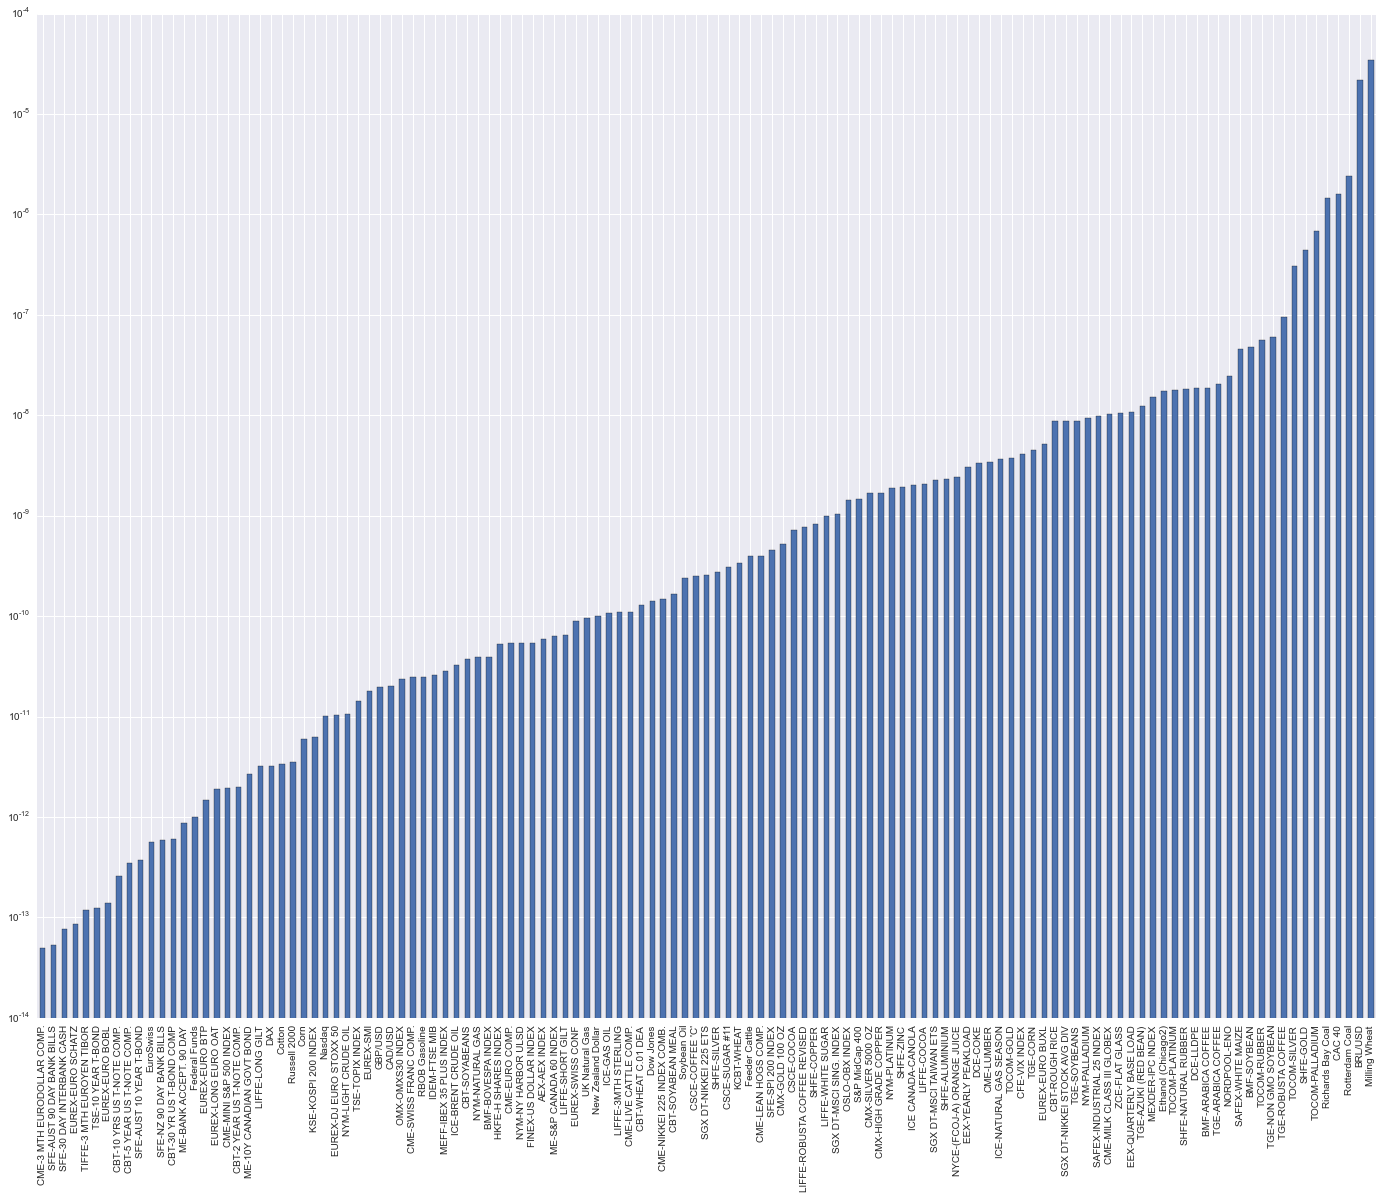

In [5]:
amihud.mean().dropna().sort_values().dropna().plot(kind='bar',logy=True)

In [6]:
mon= cleansed.resample(rule='m',how='last')
da=[]
for mkt in mon.columns:
    x = mon[mkt].dropna()[:'2016']
    d = (pd.Series(x.index[1:]) - pd.Series(x.index[:-1])).max().days
    if d > 31:
        da.append([mkt,d])
df=pd.DataFrame(da).set_index(0)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


In [7]:
mon= cleansed.resample(rule='m',how='last')
dd=pd.DataFrame()
for mkt in mon.columns:
    x = mon[mkt].dropna()[:'2016']
    d = (pd.Series(x.index[1:]) - pd.Series(x.index[:-1]))
    e=(d.values/86400000000000)
    f=e.tolist()
    oo=pd.Series(f,index=x[1:].index)
    if oo.max()>32:
        dd[mkt]=oo

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


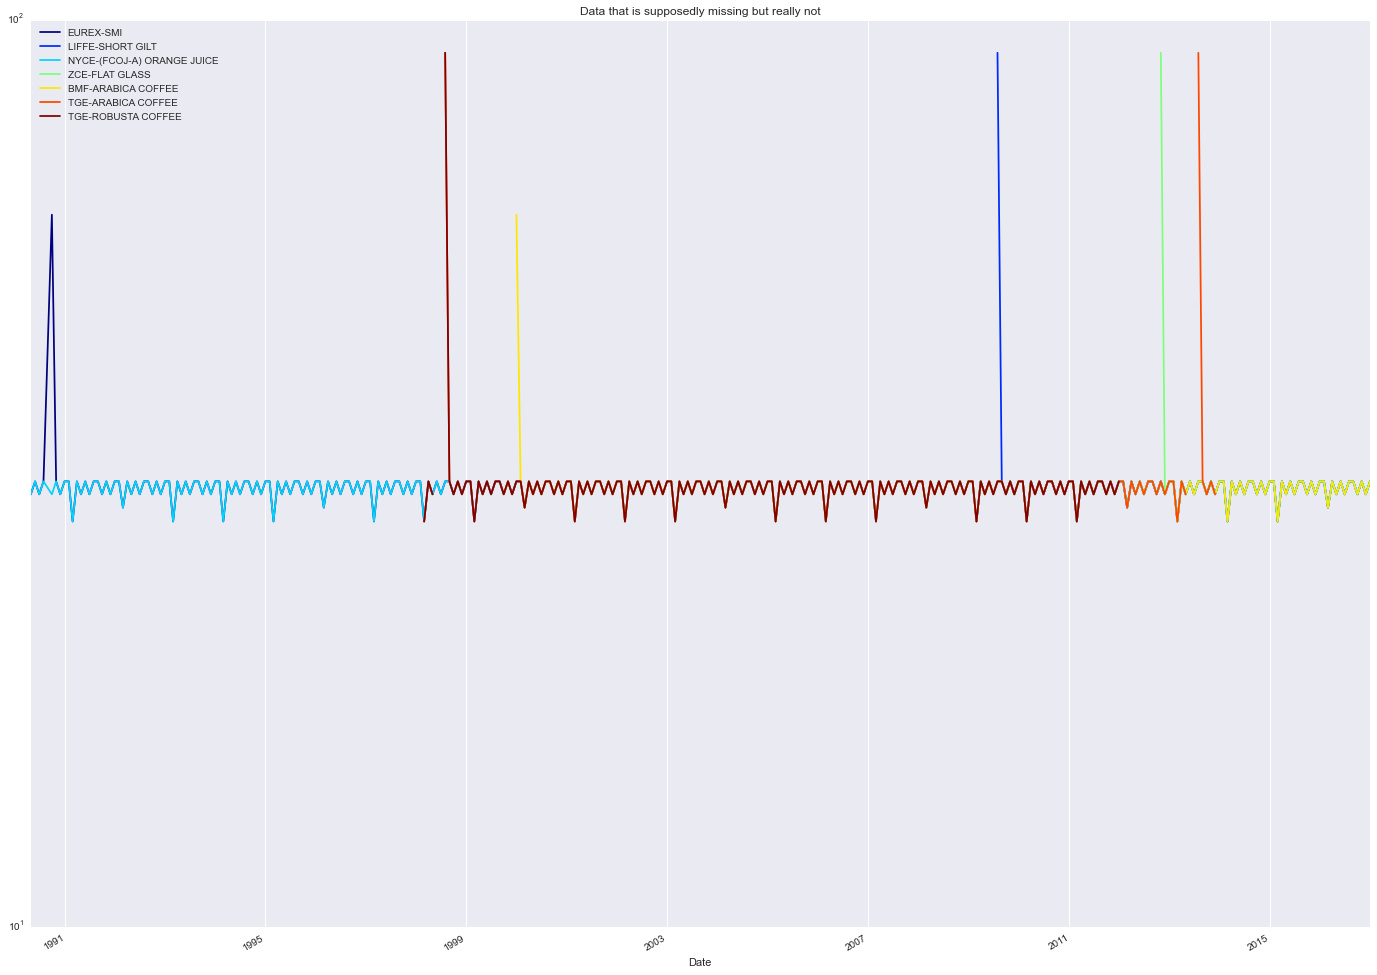

In [8]:
dd[:'2016'].plot(colormap='jet',logy=True,title='Data that is supposedly missing but really not')

#Todo


Find out how to define gap risk





/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


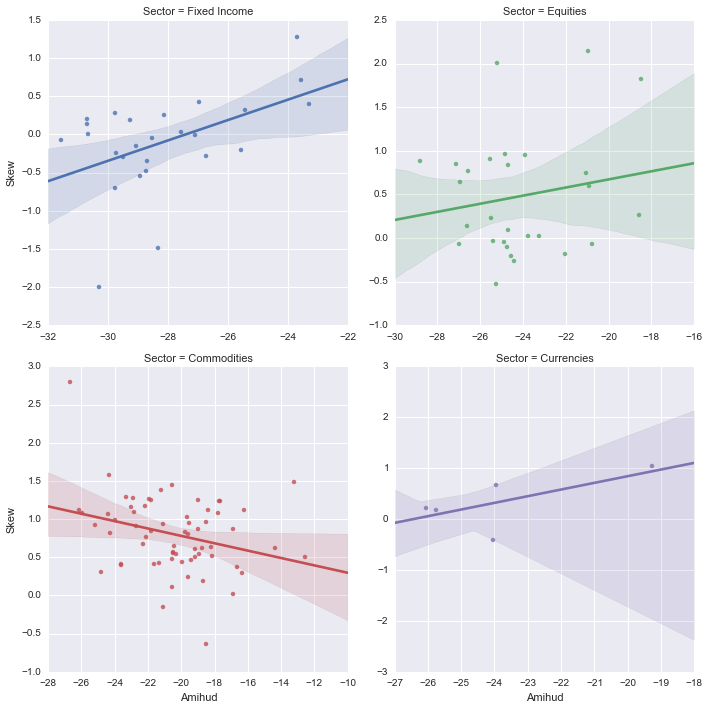

In [9]:
sk=cleansed.resample(rule='m',how='last').skew()
contract_size =load_maps()
sector_map=contract_size.to_dict()['Sector']
compare =pd.DataFrame()
compare['Skew']=sk
s=pd.Series()
for i in sk.index:
    try:
        s[i]=sector_map[i]
    except:
        print i
compare['Sector']=s
compare['Amihud']=np.log(amihud.median())
compare=compare.dropna()
sns.lmplot(x='Amihud',fit_reg=True,y='Skew',hue='Sector',sharey=False,sharex=False, 
           col='Sector',col_wrap=2,data=compare)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


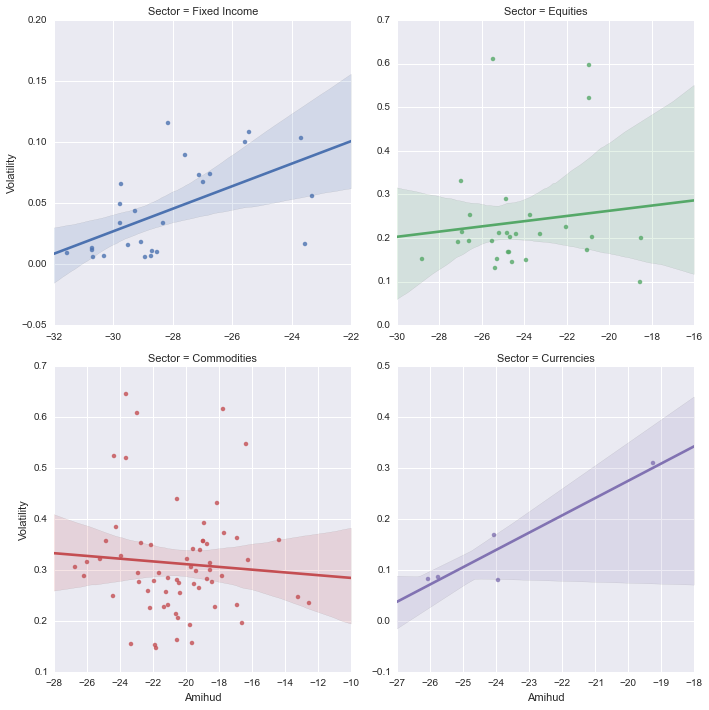

In [10]:
vol=cleansed.resample(rule='m',how='last').pct_change().std()*math.sqrt(12)
contract_size =load_maps()
sector_map=contract_size.to_dict()['Sector']
compare =pd.DataFrame()
compare['Volatility']=vol
s=pd.Series()
for i in sk.index:
    try:
        s[i]=sector_map[i]
    except:
        print i
compare['Sector']=s
compare['Amihud']=np.log(amihud.median())
compare=compare.dropna()
sns.lmplot(x='Amihud',fit_reg=True,y='Volatility',hue='Sector',sharey=False,sharex=False, 
           col='Sector',col_wrap=2,data=compare)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_max is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=1,window=100000000,center=False).max()
  from IPython.kernel.zmq import kernelapp as app


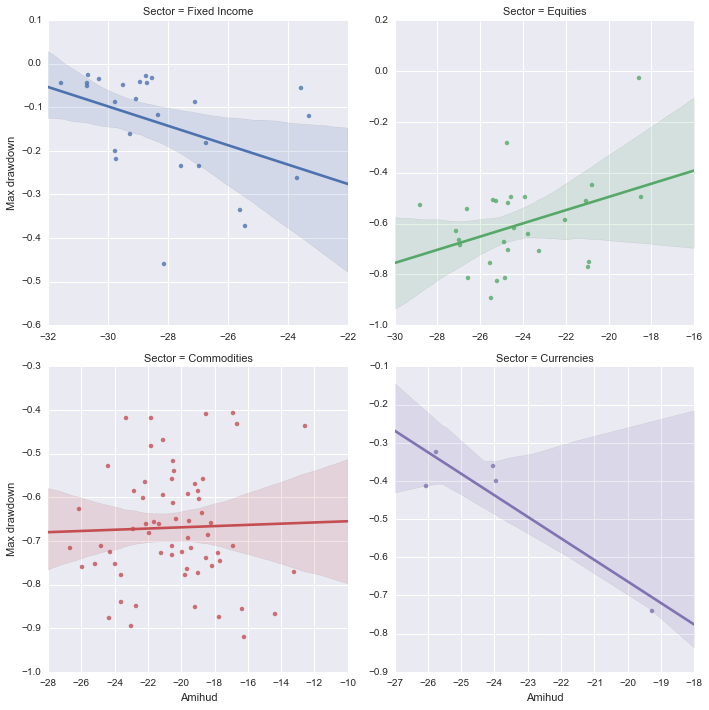

In [11]:
x=cleansed.resample(rule='m',how='last')
max_dd=(x/pd.rolling_max(x,100000000,min_periods=1)).min()-1
contract_size =load_maps()
sector_map=contract_size.to_dict()['Sector']
compare =pd.DataFrame()
compare['Max drawdown']=max_dd
s=pd.Series()
for i in sk.index:
    try:
        s[i]=sector_map[i]
    except:
        print i
compare['Sector']=s
compare['Amihud']=np.log(amihud.median())
compare=compare.dropna()
sns.lmplot(x='Amihud',fit_reg=True,y='Max drawdown',hue='Sector',sharey=False,sharex=False, 
           col='Sector',col_wrap=2,data=compare)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


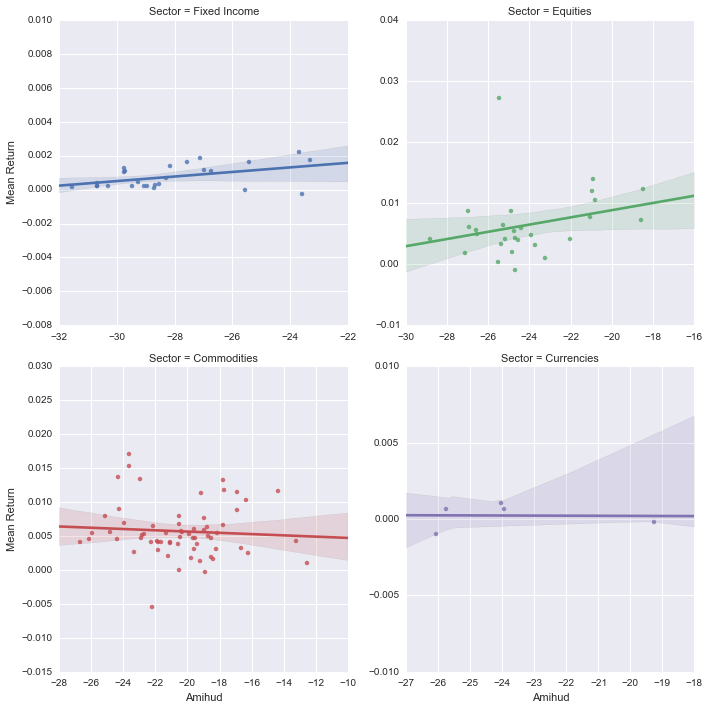

In [14]:
x=cleansed.resample(rule='m',how='last')
mean_rtn=x.pct_change().mean()
contract_size =load_maps()
sector_map=contract_size.to_dict()['Sector']
compare =pd.DataFrame()
compare['Mean Return']=mean_rtn
s=pd.Series()
for i in sk.index:
    try:
        s[i]=sector_map[i]
    except:
        print i
compare['Sector']=s
compare['Amihud']=np.log(amihud.median())
compare=compare.dropna()
sns.lmplot(x='Amihud',fit_reg=True,y='Mean Return',hue='Sector',sharey=False,sharex=False, 
           col='Sector',col_wrap=2,data=compare)